In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data provided
sources = ['excel', 'csv', 'parquet', 'json']
cpu_load = [44.75, 41.435, 36.43, 33.44]
avg_mem = [2468.39, 1307.75, 1311.63, 1347.75]
avg_time = [22.09, 9.22, 8.51, 11.63]
new_size = [2.6, 1.9, 1.9, 2.8]
prev_size = [5.3, 10.01, 1.9, 34.7]

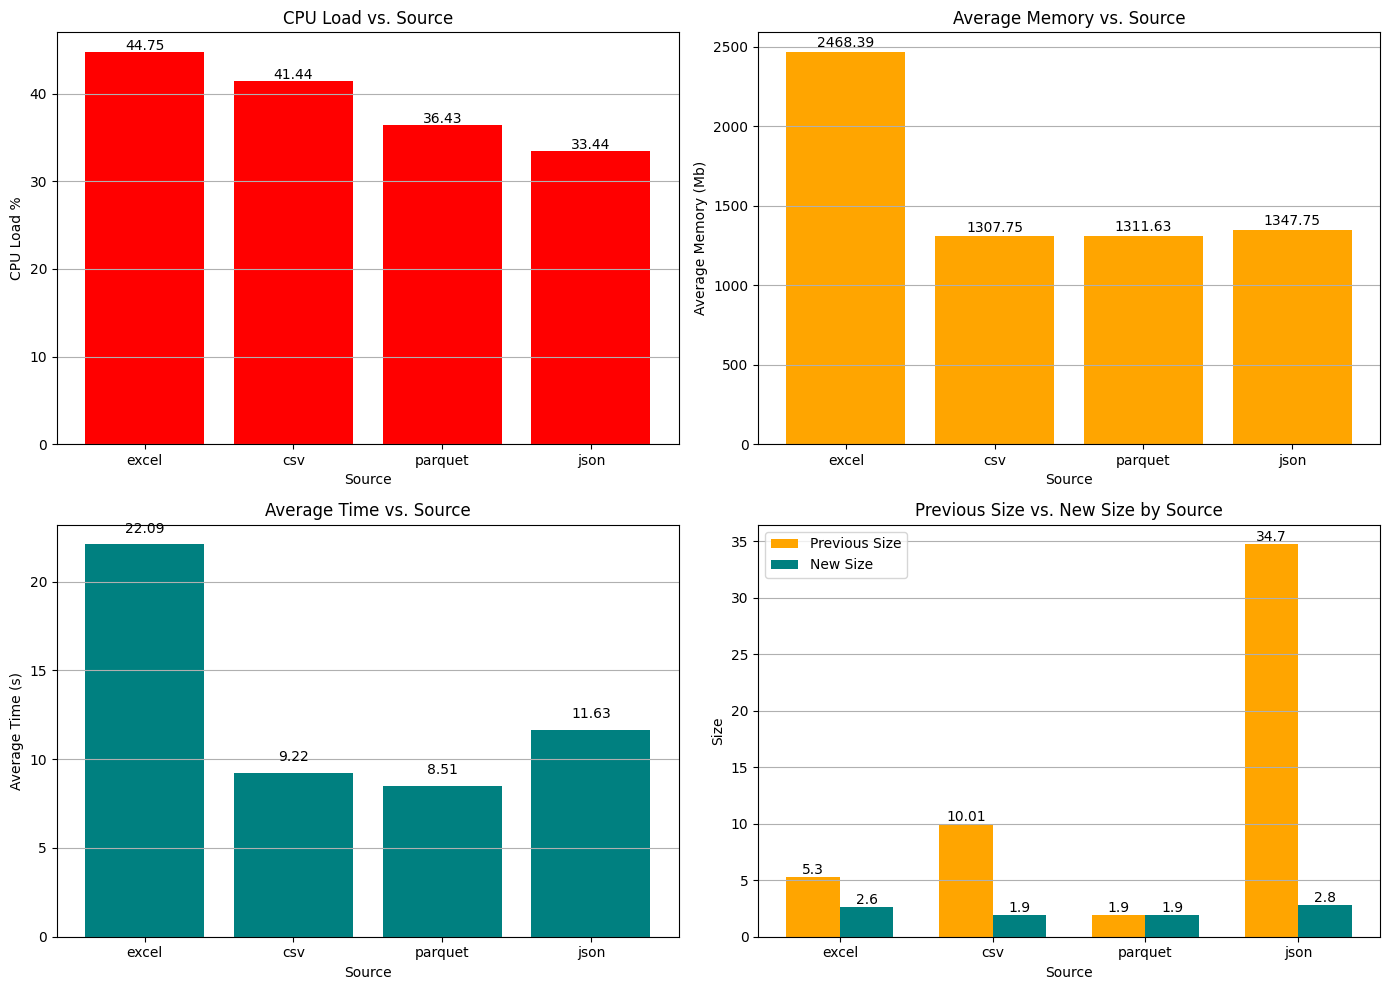

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot CPU Load
axes[0, 0].bar(sources, cpu_load, color='red')
axes[0, 0].set_title('CPU Load vs. Source')
axes[0, 0].set_xlabel('Source')
axes[0, 0].set_ylabel('CPU Load %')
axes[0, 0].yaxis.grid(True)
for i, v in enumerate(cpu_load):
    axes[0, 0].text(i, v + 1.5, str(round(v, 2)), ha='center', va='top')

# Plot Average Memory
axes[0, 1].bar(sources, avg_mem, color='orange')
axes[0, 1].set_title('Average Memory vs. Source')
axes[0, 1].set_xlabel('Source')
axes[0, 1].set_ylabel('Average Memory (Mb)')
axes[0, 1].yaxis.grid(True)
for i, v in enumerate(avg_mem):
    axes[0, 1].text(i, v + 100, str(round(v, 2)), ha='center', va='top')

# Plot Average Time
axes[1, 0].bar(sources, avg_time, color='teal')
axes[1, 0].set_title('Average Time vs. Source')
axes[1, 0].set_xlabel('Source')
axes[1, 0].set_ylabel('Average Time (s)')
axes[1, 0].yaxis.grid(True)
for i, v in enumerate(avg_time):
    axes[1, 0].text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

# Plot Previous Size vs New Size
bar_width = 0.35
index = np.arange(len(sources))

bars1 = axes[1, 1].bar(index, prev_size, bar_width, label='Previous Size', color='orange')
bars2 = axes[1, 1].bar(index + bar_width, new_size, bar_width, label='New Size', color='teal')

axes[1, 1].set_title('Previous Size vs. New Size by Source')
axes[1, 1].set_xlabel('Source')
axes[1, 1].set_ylabel('Size')
axes[1, 1].set_xticks(index + bar_width / 2)
axes[1, 1].set_xticklabels(sources)
axes[1, 1].legend()
axes[1, 1].yaxis.grid(True)

# Adding value labels
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=10, color='black'
        )

add_labels(bars1, axes[1, 1])
add_labels(bars2, axes[1, 1])

plt.tight_layout()
plt.show()

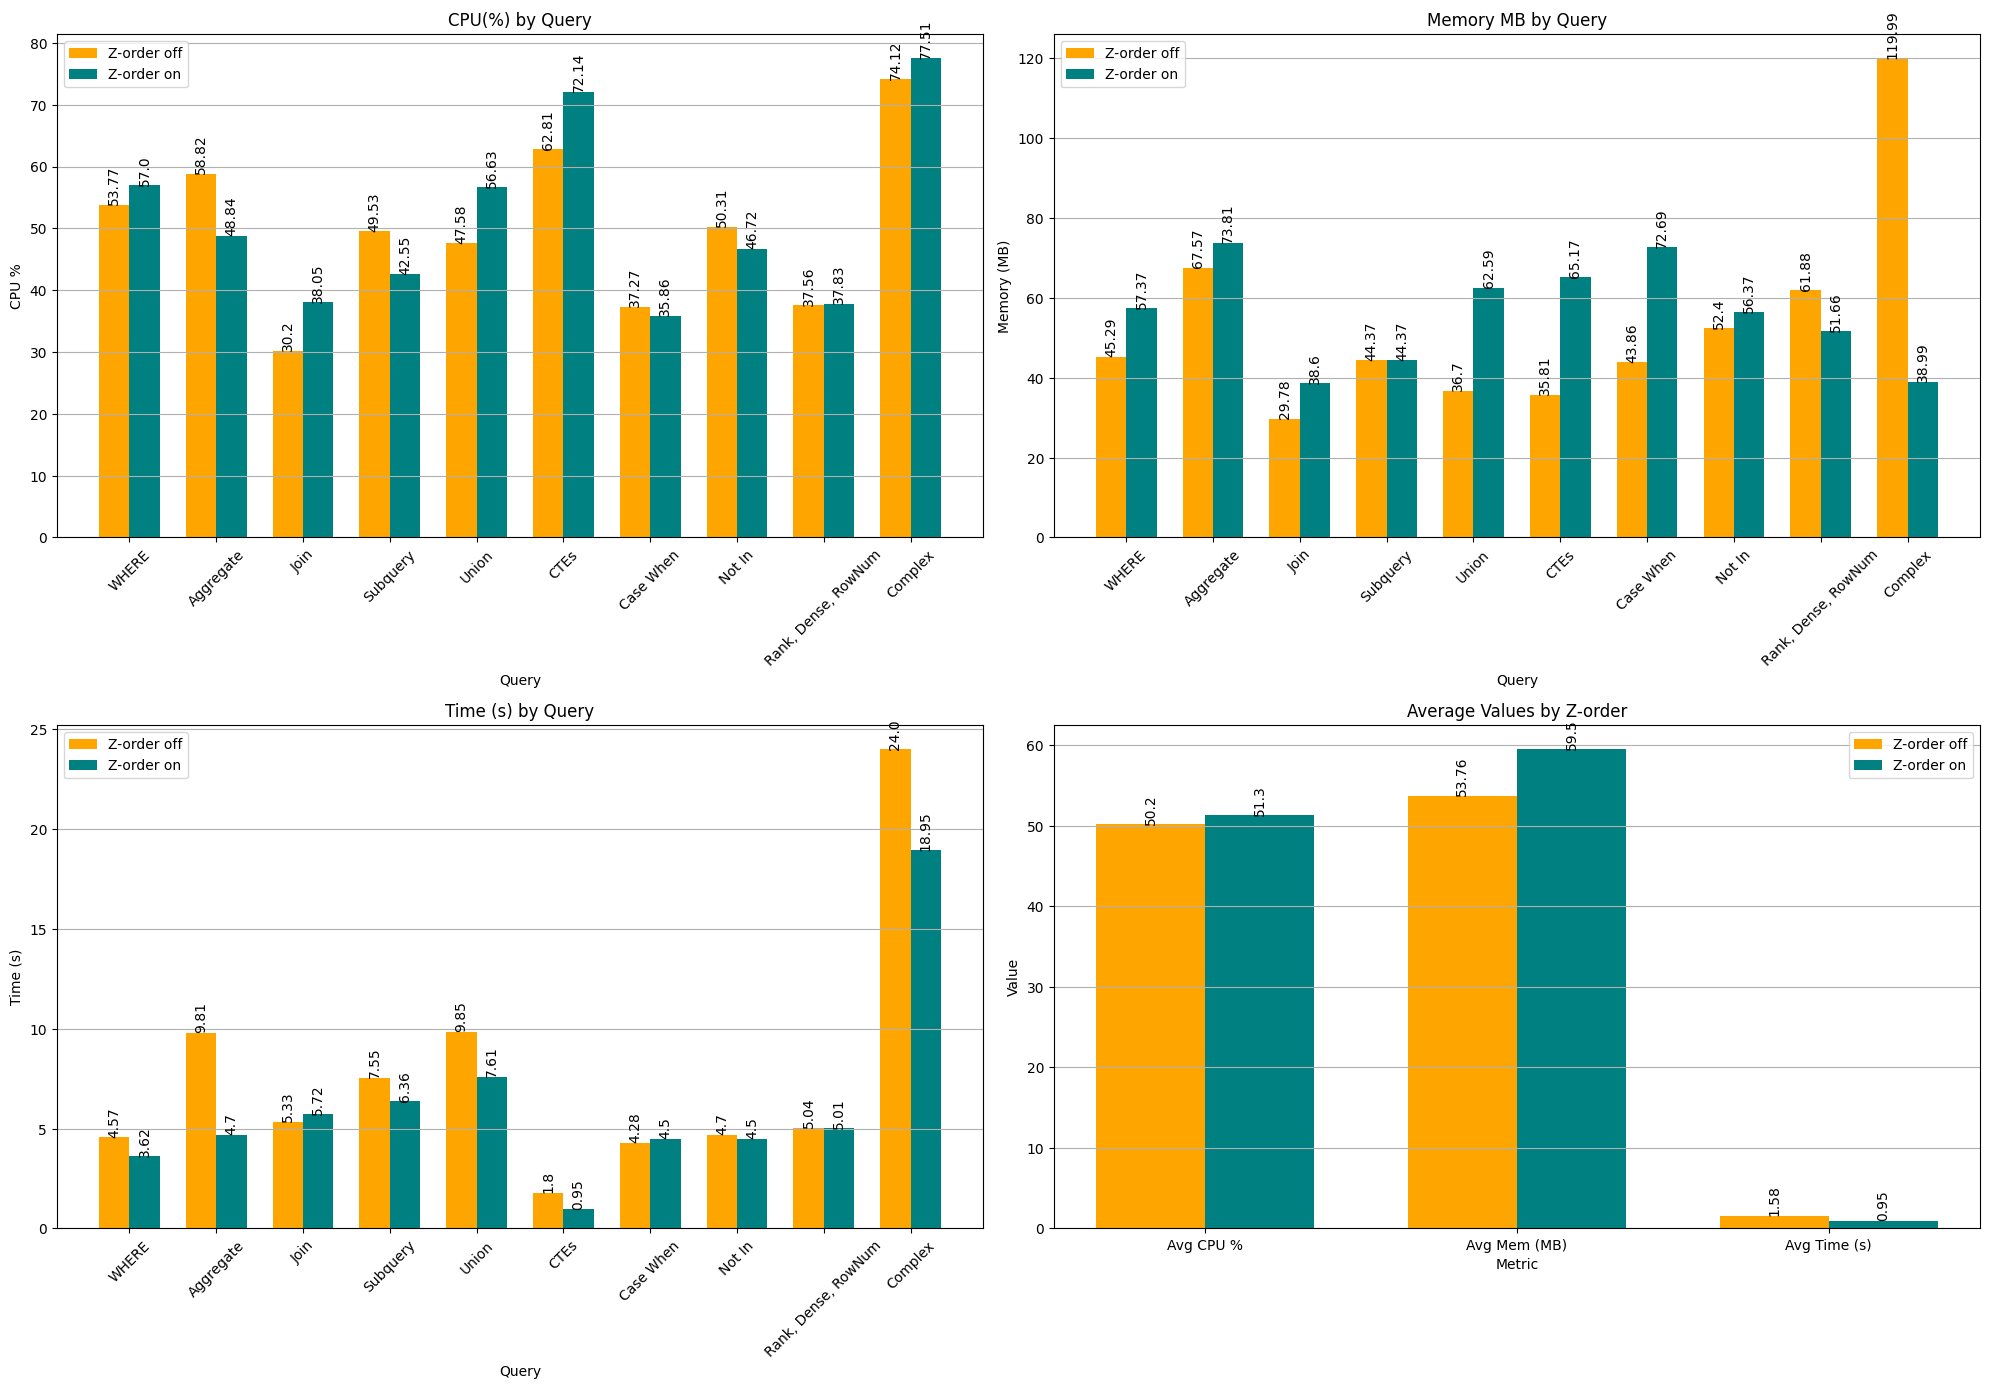

In [4]:
queries = ['WHERE', 'Aggregate', 'Join', 'Subquery', 'Union', 'CTEs', 'Case When', 'Not In', 'Rank, Dense, RowNum', 'Complex']
cpu_zoff = [53.77, 58.82, 30.2, 49.53, 47.58, 62.81, 37.27, 50.31, 37.56, 74.12]
memory_zoff = [45.29, 67.57, 29.78, 44.37, 36.7, 35.81, 43.86, 52.4, 61.88, 119.99]
time_zoff = [4.57, 9.81, 5.33, 7.55, 9.85, 1.8, 4.28, 4.7, 5.04, 24]

cpu_zon = [57, 48.84, 38.05, 42.55, 56.63, 72.14, 35.86, 46.72, 37.83, 77.51]
memory_zon = [57.37, 73.81, 38.6, 44.37, 62.59, 65.17, 72.69, 56.37, 51.66, 38.99]
time_zon = [3.62, 4.7, 5.72, 6.36, 7.61, 0.95, 4.5, 4.5, 5.01, 18.95]

# Calculate averages
avg_cpu_zoff = 50.197
avg_mem_zoff = 53.765
avg_time_zoff = 1.58

avg_cpu_zon = 51.303
avg_mem_zon = 59.505
avg_time_zon = 0.95

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 14))  # Increased figure size

# Plot CPU %
bar_width = 0.35
index = np.arange(len(queries))

bars1 = axes[0, 0].bar(index, cpu_zoff, bar_width, label='Z-order off', color='orange')
bars2 = axes[0, 0].bar(index + bar_width, cpu_zon, bar_width, label='Z-order on', color='teal')

axes[0, 0].set_title('CPU(%) by Query')
axes[0, 0].set_xlabel('Query')
axes[0, 0].set_ylabel('CPU %')
axes[0, 0].set_xticks(index + bar_width / 2)
axes[0, 0].set_xticklabels(queries, rotation=45)  # Rotated X-axis labels
axes[0, 0].legend()
axes[0, 0].yaxis.grid(True)

# Adding value labels with correct formatting and vertical placement
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height, f'{round(height, 2)}', 
            ha='center', va='bottom', fontsize=10, color='black', rotation='vertical'  # Vertical placement
        )

add_labels(bars1, axes[0, 0])
add_labels(bars2, axes[0, 0])

# Plot Memory MB
bars1 = axes[0, 1].bar(index, memory_zoff, bar_width, label='Z-order off', color='orange')
bars2 = axes[0, 1].bar(index + bar_width, memory_zon, bar_width, label='Z-order on', color='teal')

axes[0, 1].set_title('Memory MB by Query')
axes[0, 1].set_xlabel('Query')
axes[0, 1].set_ylabel('Memory (MB)')
axes[0, 1].set_xticks(index + bar_width / 2)
axes[0, 1].set_xticklabels(queries, rotation=45)  # Rotated X-axis labels
axes[0, 1].legend()
axes[0, 1].yaxis.grid(True)

add_labels(bars1, axes[0, 1])
add_labels(bars2, axes[0, 1])

# Plot Time (s)
bars1 = axes[1, 0].bar(index, time_zoff, bar_width, label='Z-order off', color='orange')
bars2 = axes[1, 0].bar(index + bar_width, time_zon, bar_width, label='Z-order on', color='teal')

axes[1, 0].set_title('Time (s) by Query')
axes[1, 0].set_xlabel('Query')
axes[1, 0].set_ylabel('Time (s)')
axes[1, 0].set_xticks(index + bar_width / 2)
axes[1, 0].set_xticklabels(queries, rotation=45)  # Rotated X-axis labels
axes[1, 0].legend()
axes[1, 0].yaxis.grid(True)

add_labels(bars1, axes[1, 0])
add_labels(bars2, axes[1, 0])

# Plot Average CPU, Memory, Time
avg_values = ['Avg CPU %', 'Avg Mem (MB)', 'Avg Time (s)']
avg_index = np.arange(len(avg_values))

bars1 = axes[1, 1].bar(avg_index, [avg_cpu_zoff, avg_mem_zoff, avg_time_zoff], bar_width, label='Z-order off', color='orange')
bars2 = axes[1, 1].bar(avg_index + bar_width, [avg_cpu_zon, avg_mem_zon, avg_time_zon], bar_width, label='Z-order on', color='teal')

axes[1, 1].set_title('Average Values by Z-order')
axes[1, 1].set_xlabel('Metric')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_xticks(avg_index + bar_width / 2)
axes[1, 1].set_xticklabels(avg_values, rotation=0)  # Rotated X-axis labels
axes[1, 1].legend()
axes[1, 1].yaxis.grid(True)

add_labels(bars1, axes[1, 1])
add_labels(bars2, axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


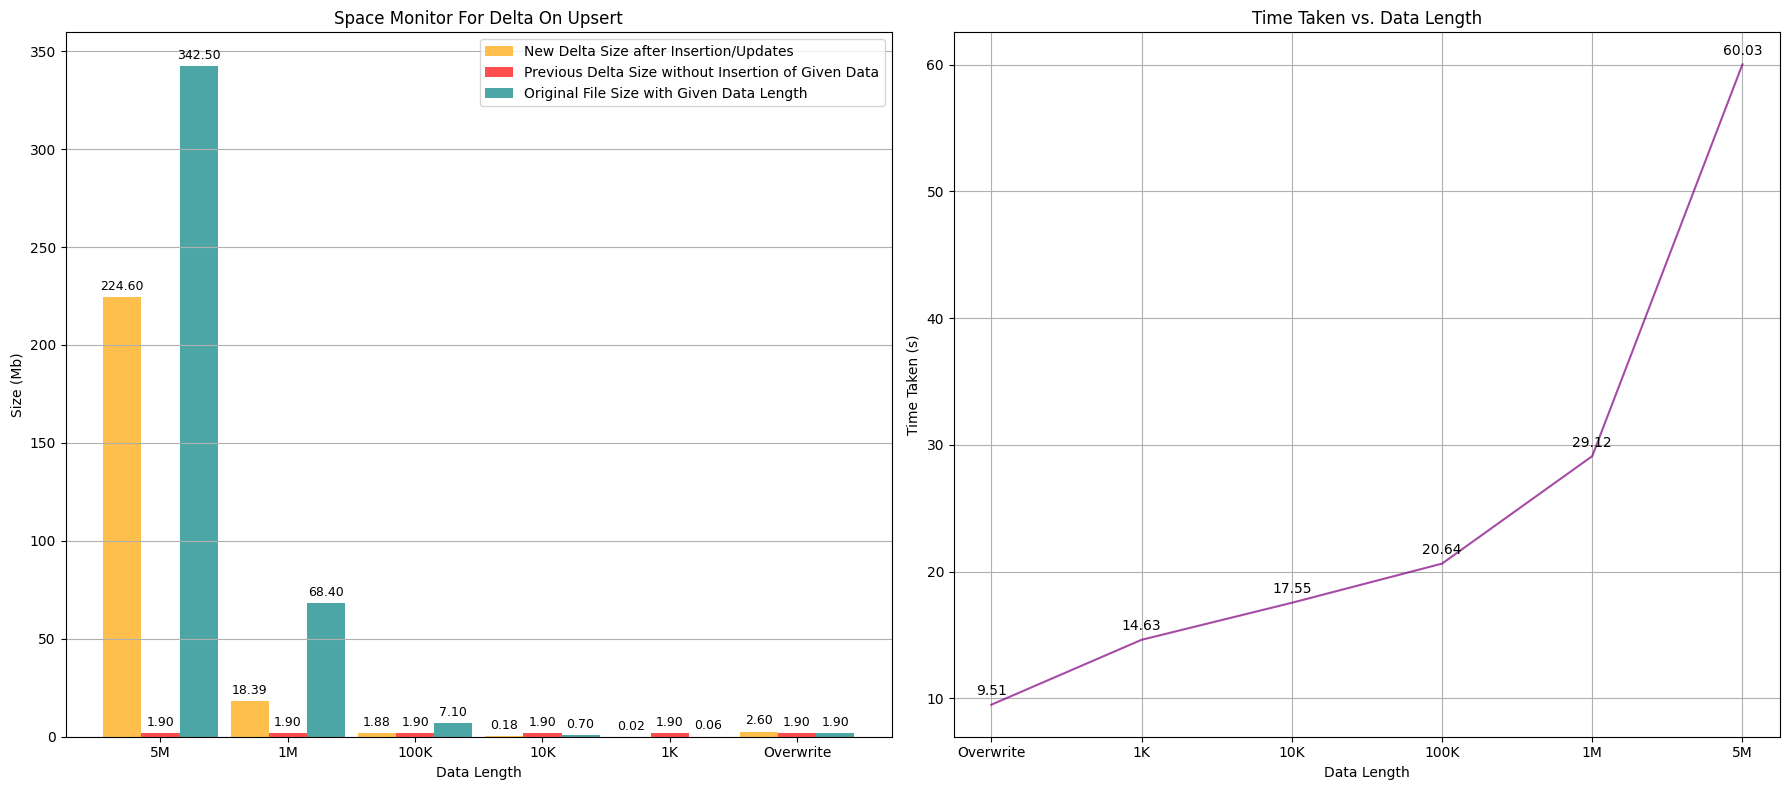

In [12]:
data_lengths = ['5M', '1M', '100K', '10K', '1K', 'Overwrite']
new_size = [224.6, 18.39, 1.88, 0.18, 0.02, 2.6]
og_size = [1.9, 1.9, 1.9, 1.9, 1.9, 1.9]
time = [60.03, 29.12, 20.64, 17.55, 14.63, 9.51]
datafile_size = [342.5, 68.4, 7.1, 0.705, 0.06, 1.9]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Space Monitor for Delta On Upsert
bar_width = 0.3
index = np.arange(len(data_lengths))

bars1 = ax1.bar(index, new_size, bar_width, label='New Delta Size after Insertion/Updates', color='orange', alpha=0.7)
bars2 = ax1.bar(index + bar_width, og_size, bar_width, label='Previous Delta Size without Insertion of Given Data', color='red', alpha=0.7)
bars3 = ax1.bar(index + 2*bar_width, datafile_size, bar_width, label='Original File Size with Given Data Length', color='teal', alpha=0.7)

ax1.set_xlabel('Data Length')
ax1.set_ylabel('Size (Mb)')
ax1.set_title('Space Monitor For Delta On Upsert')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(data_lengths)
ax1.yaxis.grid(True)
ax1.legend()

# Adding labels
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_labels(bars1, ax1)
add_labels(bars2, ax1)
add_labels(bars3, ax1)

# Plot 2: Time Taken vs. Data Length
ax2.plot(data_lengths[::-1], time[::-1], color='purple', alpha=0.7)
ax2.set_xlabel('Data Length')
ax2.set_ylabel('Time Taken (s)')
ax2.set_title('Time Taken vs. Data Length')
ax2.grid(True)

# Adding labels for the second plot
for i, v in enumerate(time[::-1]):
    ax2.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

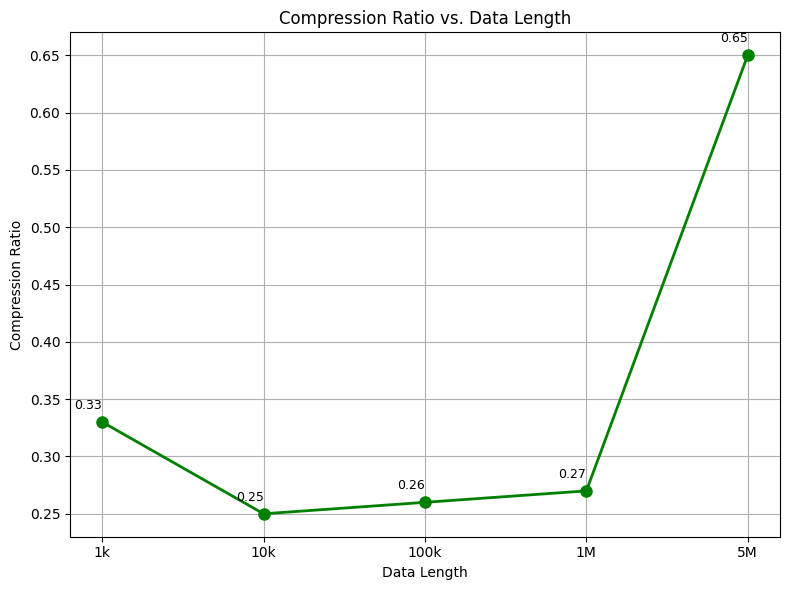

In [70]:
compression_ratio=[0.33,0.25,0.26,0.27,0.65]
data_lengths = ['1k','10k','100k','1M','5M']

plt.figure(figsize=(8, 6))
plt.plot(data_lengths, compression_ratio, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)


plt.title('Compression Ratio vs. Data Length')
plt.xlabel('Data Length')
plt.ylabel('Compression Ratio')
plt.grid(True)

# Adding value labels
for i, v in enumerate(compression_ratio):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='right', va='top', fontsize=9)

plt.tight_layout()
plt.show()

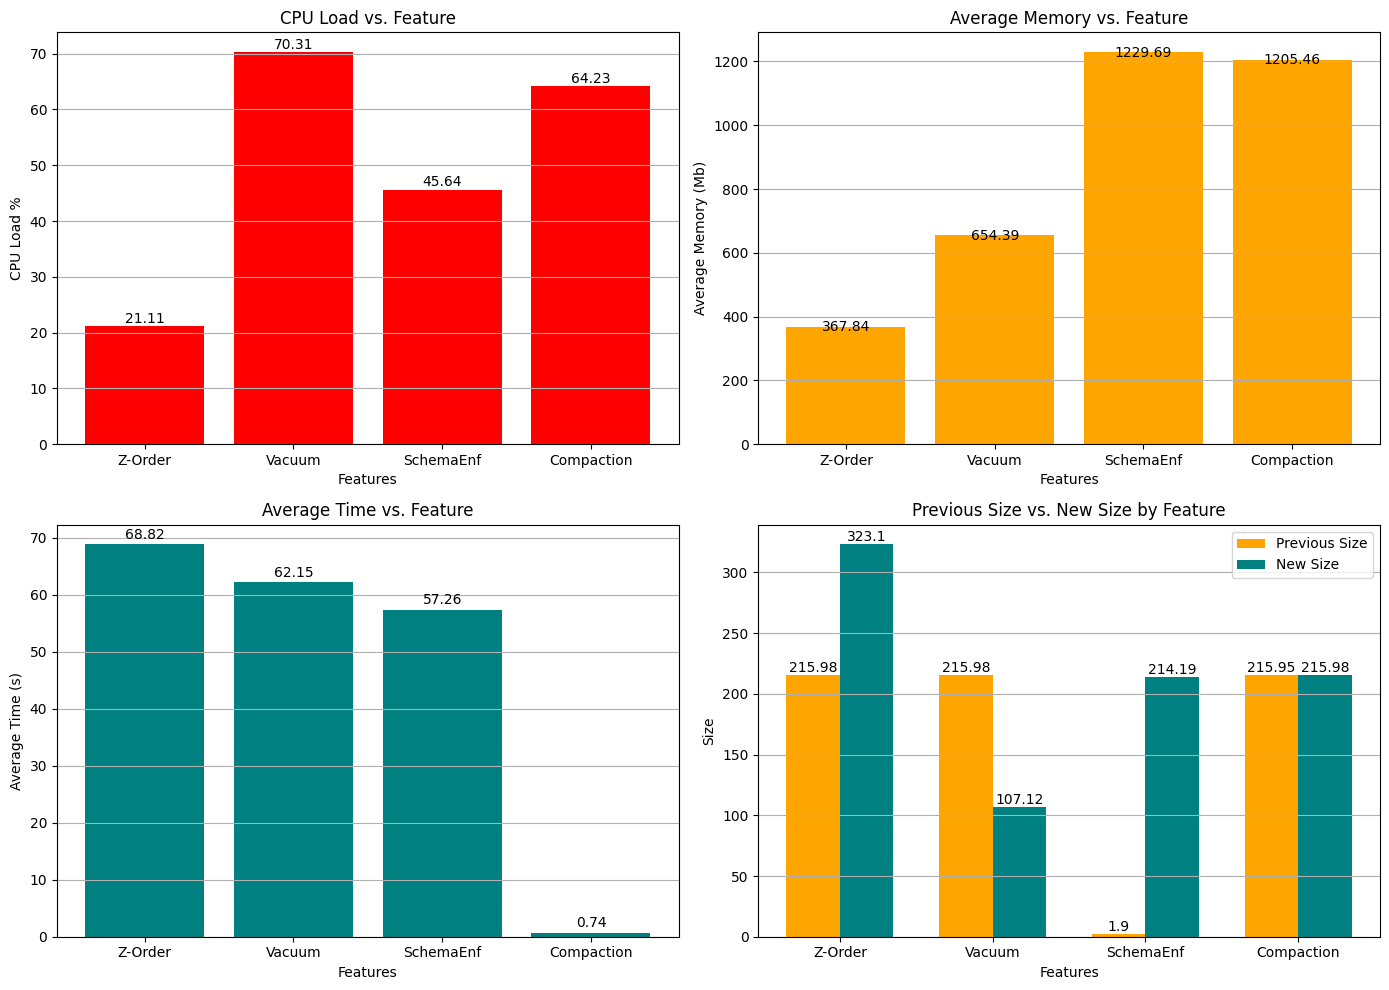

In [3]:
features = ['Z-Order', 'Vacuum', 'SchemaEnf', 'Compaction']
cpu_load = [21.11, 70.31, 45.64,64.23]
avg_mem = [367.84, 654.39, 1229.69,1205.46]
avg_time = [68.82, 62.15, 57.26,0.74]
new_size = [323.1, 107.12, 214.19,215.98]
prev_size = [215.98, 215.98, 1.9,215.95]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot CPU Load
axes[0, 0].bar(features, cpu_load, color='red')
axes[0, 0].set_title('CPU Load vs. Feature')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('CPU Load %')
axes[0, 0].yaxis.grid(True)
for i, v in enumerate(cpu_load):
    axes[0, 0].text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')

# Plot Average Memory
axes[0, 1].bar(features, avg_mem, color='orange')
axes[0, 1].set_title('Average Memory vs. Feature')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Average Memory (Mb)')
axes[0, 1].yaxis.grid(True)
for i, v in enumerate(avg_mem):
    axes[0, 1].text(i, v + 20, str(round(v, 2)), ha='center', va='top')

# Plot Average Time
axes[1, 0].bar(features, avg_time, color='teal')
axes[1, 0].set_title('Average Time vs. Feature')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Average Time (s)')
axes[1, 0].yaxis.grid(True)
for i, v in enumerate(avg_time):
    axes[1, 0].text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom')

# Plot Previous Size vs New Size
bar_width = 0.35
index = np.arange(len(features))

bars1 = axes[1, 1].bar(index, prev_size, bar_width, label='Previous Size', color='orange')
bars2 = axes[1, 1].bar(index + bar_width, new_size, bar_width, label='New Size', color='teal')

axes[1, 1].set_title('Previous Size vs. New Size by Feature')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Size')
axes[1, 1].set_xticks(index + bar_width / 2)
axes[1, 1].set_xticklabels(features)
axes[1, 1].legend()
axes[1, 1].yaxis.grid(True)

# Adding value labels
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height, f'{height}', 
            ha='center', va='bottom', fontsize=10, color='black'
        )

add_labels(bars1, axes[1, 1])
add_labels(bars2, axes[1, 1])

plt.tight_layout()
plt.show()

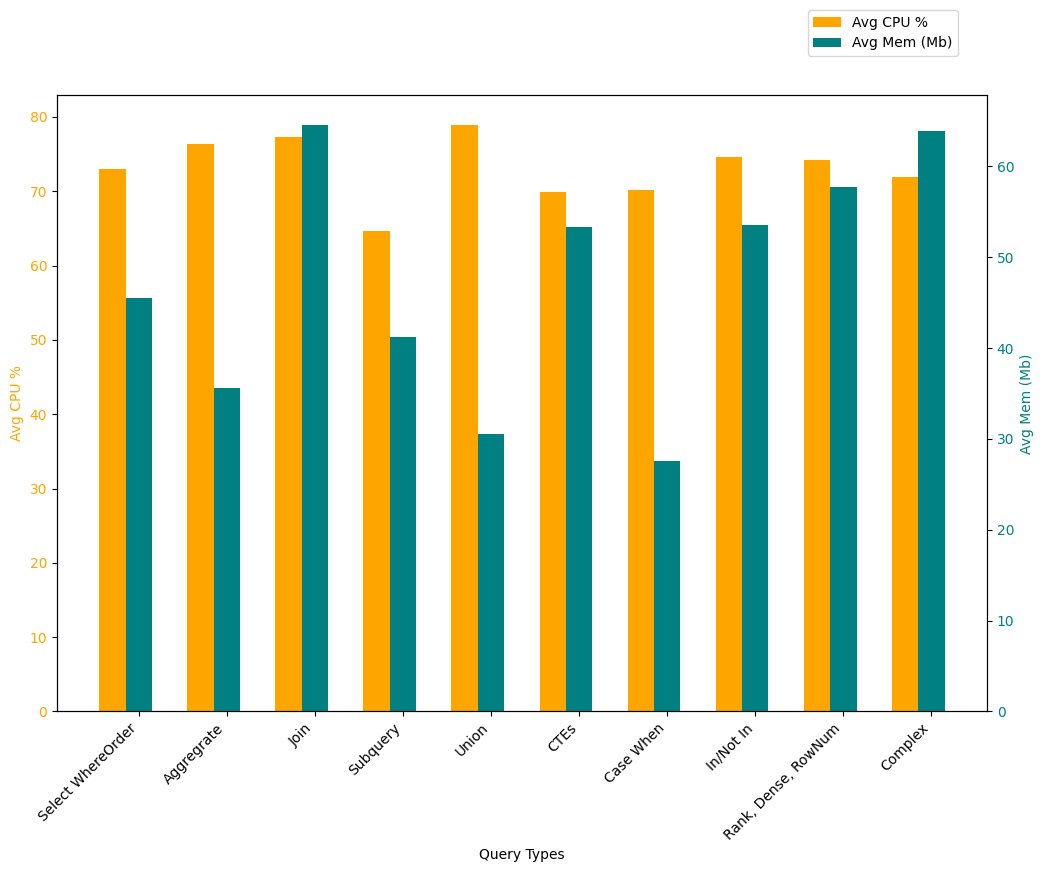

In [10]:
queries = ['Select WhereOrder', 'Aggregrate', 'Join', 'Subquery', 'Union', 
           'CTEs', 'Case When', 'In/Not In', 'Rank, Dense, RowNum', 'Complex']
avg_cpu = [73.067, 76.35, 77.29, 64.7, 78.95, 69.84, 70.12, 74.59, 74.22, 71.92]
avg_mem = [45.463, 35.59, 64.58, 41.18, 30.57, 53.28, 27.61, 53.54, 57.71, 63.86]
avg_time = [2.96, 4.78, 4.85, 3.56, 5.03, 3.05, 4.23, 2.96, 5.19, 6.43]

# Plotting
x = np.arange(len(queries))
width = 0.3

fig, ax1 = plt.subplots(figsize=(12, 8))

# Avg CPU %
rects1 = ax1.bar(x - width, avg_cpu, width, label='Avg CPU %', color='orange')
ax1.set_xlabel('Query Types')
ax1.set_ylabel('Avg CPU %', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xticks(x)
ax1.set_xticklabels(queries, rotation=45, ha='right')

# Creating a second y-axis for Avg Mem (Mb)
ax2 = ax1.twinx()
rects2 = ax2.bar(x, avg_mem, width, label='Avg Mem (Mb)', color='teal')
ax2.set_ylabel('Avg Mem (Mb)', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

bars = [rects1, rects2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left', bbox_to_anchor=(0.8, 1.15))

# Showing the plot
plt.show()


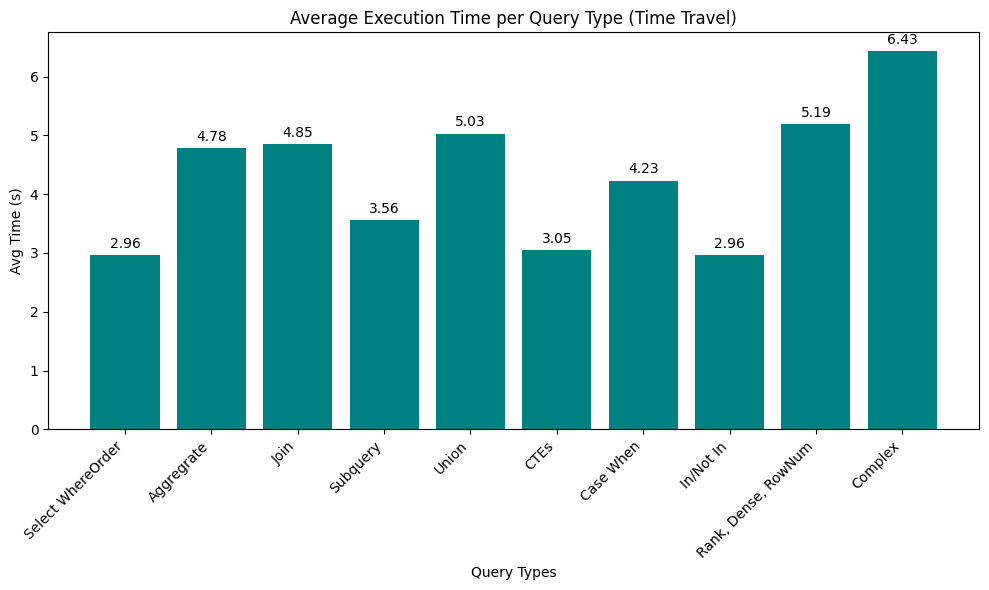

In [11]:
queries = ['Select WhereOrder', 'Aggregrate', 'Join', 'Subquery', 'Union', 
           'CTEs', 'Case When', 'In/Not In', 'Rank, Dense, RowNum', 'Complex']
avg_time = [2.96, 4.78, 4.85, 3.56, 5.03, 3.05, 4.23, 2.96, 5.19, 6.43]

# Plotting
x = np.arange(len(queries))

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Avg Time (s)
rects = ax.bar(x, avg_time, color='teal')
ax.set_xlabel('Query Types')
ax.set_ylabel('Avg Time (s)')
ax.set_title('Average Execution Time per Query Type (Time Travel)')
ax.set_xticks(x)
ax.set_xticklabels(queries, rotation=45, ha='right')

# Adding labels to each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Showing the plot
plt.tight_layout()
plt.show()
